In [27]:
#Importing necessary libraries
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 

## Loading the data

In [28]:
#Loading the data
df=pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [29]:
#Identifying number of rows and columns
df.shape

(21597, 21)

In [30]:
#Checking data info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

## Exploring Data Distributions

### Price distribution


Producing a histogram for `price`

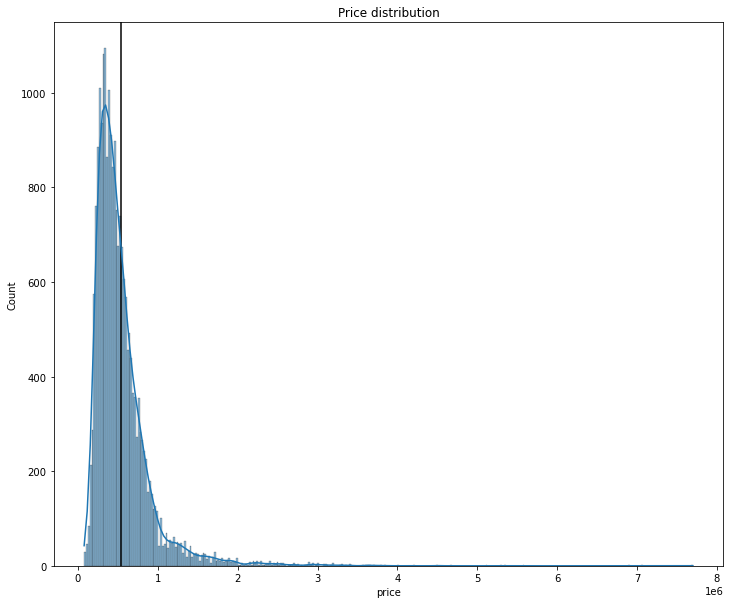

In [31]:
data=df['price']
mean=data.mean()
fig,ax=plt.subplots(figsize=(12,10))
ax.axvline(mean,color='black')
sns.histplot(data, kde=True)
ax.set_title('Price distribution')
plt.show()

Calculating skewness 

In [32]:
round(df['price'].skew(), 2)

4.02

In [33]:
def print_stats(df,column):
    print('Mean:', df[column].mean())
    print('Median:', df[column].median())
    print('Satandard Deviation:', df[column].std())
print_stats(df, 'price')

Mean: 540296.5735055795
Median: 450000.0
Satandard Deviation: 367368.1401013945


Looks like a log normal distribution. Most houses in this sample are clustered around the median value of $450,000, but the   higher-end homes are pulling the mean up to over $540296. As per result of skew function we can see that its value is positive, this is inline with observation from historgram where tail of distribution is skewed towards right side.

### Overall condition

Histogram for `condition`

[]

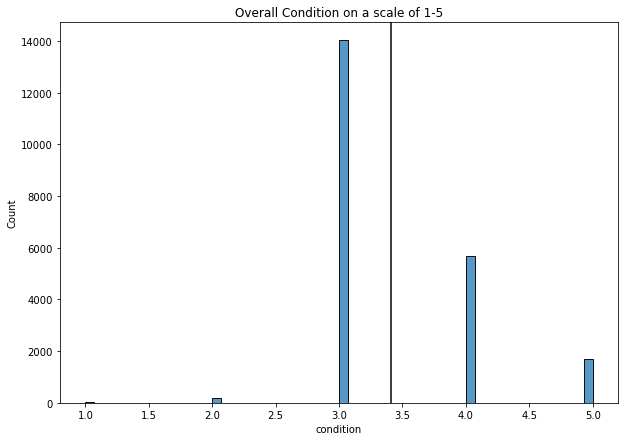

In [34]:
data=df['condition']
mean=data.mean()
fig,ax=plt.subplots(figsize=(10,7))
ax.set_title('Overall Condition on a scale of 1-5')
ax.axvline(mean,color='black')
sns.histplot(data)
plt.plot()


In [35]:
print_stats(df,'condition')

Mean: 3.4098254387183404
Median: 3.0
Satandard Deviation: 0.6505456356725546


Most houses have a condition of 3. This should be treated as a categorical variable rather than a numeric one as the difference between the conditions is abrupt.

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

## Bivariate Analysis


### Overall Condition vs Sale Price

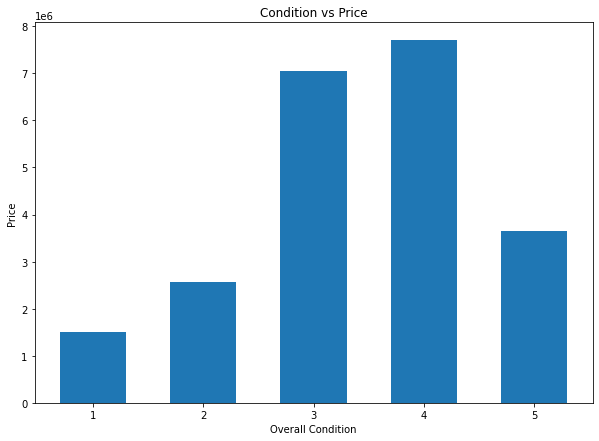

In [37]:
x=df['condition']
y=df['price']
fig,ax=plt.subplots(figsize=(10,7))
ax.bar(x,y,width=0.6)
ax.set_ylabel("Price")
ax.set_xlabel("Overall Condition")
ax.set_title("Condition vs Price")
plt.show()

The houses with an overall condition of about 3 and 4 seem to have the highest sale price. This is a suprise as you would expect the ones with an overall condition of about 5 to have the highest sale price.

### Number of bathrooms vs Price 

c:\Users\Oswald\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


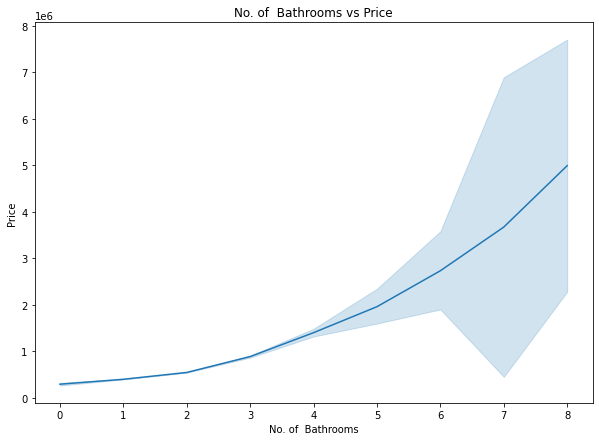

In [38]:
x=df['bathrooms'].astype(int)
y=df['price']
fig,ax=plt.subplots(figsize=(10,7))
sns.lineplot(x,y)
ax.set_ylabel("Price")
ax.set_xlabel("No. of  Bathrooms")
ax.set_title("No. of  Bathrooms vs Price")
plt.show()

Looking at the lineplot, the number of bathrooms have a linear relationship to the price. The number of batthrooms could therefore contribute to the overall price of the house. 

### Number of bedrooms vs Price

c:\Users\Oswald\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


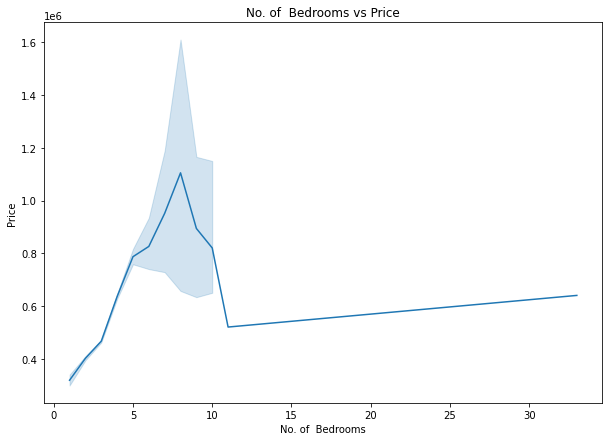

In [39]:
x=df['bedrooms']
y=df['price']
fig,ax=plt.subplots(figsize=(10,7))
sns.lineplot(x,y)
ax.set_ylabel("Price")
ax.set_xlabel("No. of  Bedrooms")
ax.set_title("No. of  Bedrooms vs Price")
plt.show()

From the line graph we can tell that the price increases with the number of bedrooms upto around where we have 8 bedrooms. The price also increases from 12 to 33 bedrooms but there is a decrease in the slope meaning the impact of the number of bedrooms to the price decreases as soon as we get to about 8.

### Number of floors vs Price 

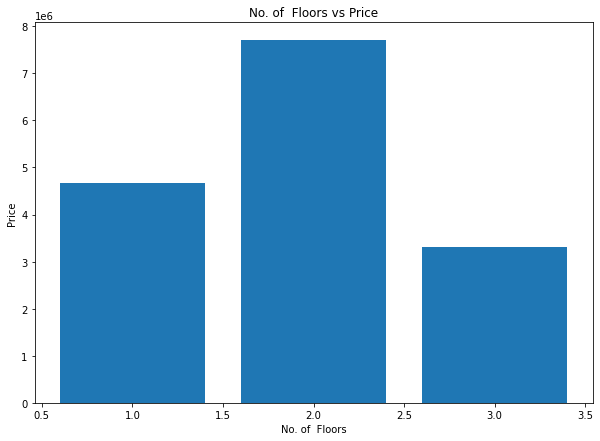

In [40]:
x=df['floors'].astype(int)
y=df['price']
fig,ax=plt.subplots(figsize=(10,7))
ax.bar(x,y)
ax.set_ylabel("Price")
ax.set_xlabel("No. of  Floors")
ax.set_title("No. of  Floors vs Price")
plt.show()

From the bar graph we can tell that the most expensive houses have about two floors. One suprising inference is that those with one floor are more expensive as compared to those with three floors.

### View Rating vs Price 

c:\Users\Oswald\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


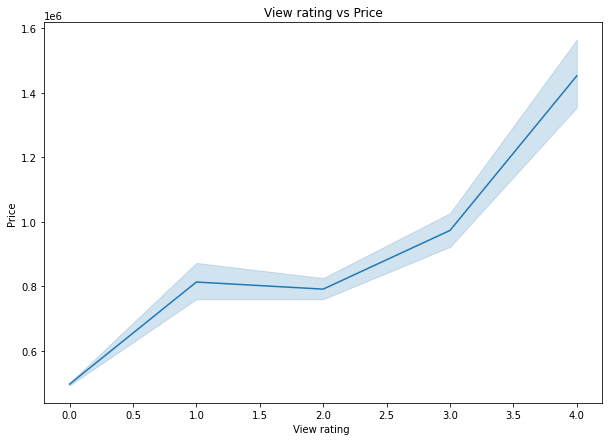

In [41]:
x=df['view']
y=df['price']
fig,ax=plt.subplots(figsize=(10,7))
sns.lineplot(x,y)
ax.set_ylabel("Price")
ax.set_xlabel("View rating ")
ax.set_title("View rating vs Price")
plt.show()

 Houses with a view rating higher than two have a positive linear relationship with the price.

### King's County Grade vs Price 

c:\Users\Oswald\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


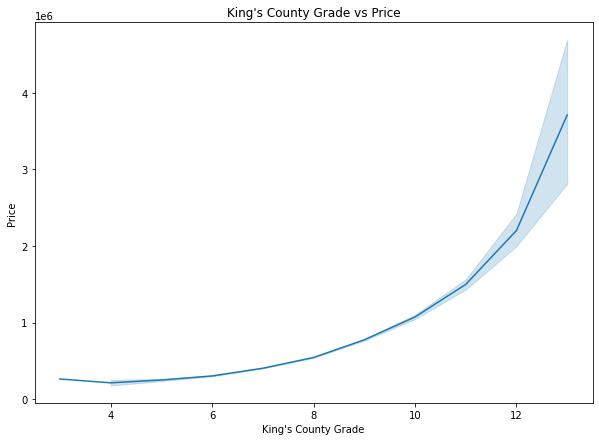

In [42]:
x=df['grade']
y=df['price']
fig,ax=plt.subplots(figsize=(10,7))
sns.lineplot(x,y)
ax.set_ylabel("Price")
ax.set_xlabel("King's County Grade")
ax.set_title("King's County Grade vs Price")
plt.show()

The King's County Grade and the prices have a positive linear relationship.

## Multivariate Analysis

### Exploring differences between subsets

Here, we will create subsets of the full dataset based on our categorical variable `condition`, then plot their distibutions based on the `price`.


* `below_average_condition`: home sales where the overall condition was less than 2.5
* `average_condition`: home sales where the overall condition was exactly 2.5
* `above_average_condition`: home sales where the overall condition was greater than 2.5

In [43]:
#Creating subsets
below_average_condition=df[df['condition']<2.5]
average_condition=df[df['condition']==2.5]
above_average_condition=df[df['condition']>2.5]


[]

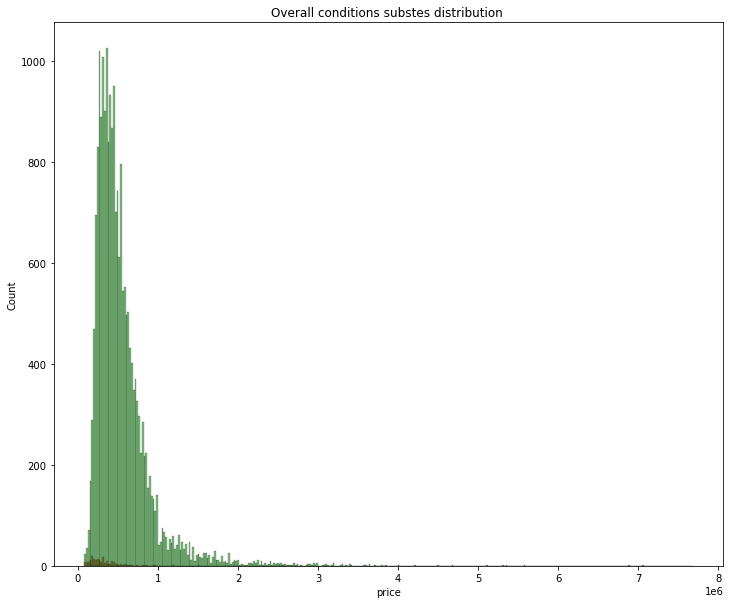

In [44]:
fig,ax=plt.subplots(figsize=(12,10))
ax.set_title("Overall conditions substes distribution ")
#Creating custom bins so they are all on the same scale
bins = range(int(df["price"].min()), int(df["price"].max()), int(df["price"].median()) // 20)
sns.histplot(x=below_average_condition['price'],bins=bins,color="red",
    alpha=0.5)
sns.histplot(x=average_condition['price'],bins=bins,color="gray",
    alpha=0.3)
sns.histplot(x=above_average_condition['price'],bins=bins,color="green",

    alpha=0.5)
plt.plot()

Most houses have an above average condition. The above average condition contains houses across a broader spectrum of the price range. 

Very few houses have a below average condition. The prices for these houses as expected are very low. 

There are no houses with an average condition(set at 2.5)

##

## Exploring correlations

To understand which features will lead to higher prices, we will use correlations. We will look for the column that is most positively correlated to `price` and the column that is most negatively correlated to `price`.

In [45]:
correlations = df.corr()['price'].sort_values()

#taking the second highest as the highest is the price column itself
max_corr_value = correlations.iloc[-2]
max_corr_column = correlations.index[-2]

print("Most Positively Correlated Column:", max_corr_column)
print("Maximum Correlation Value:", max_corr_value)

Most Positively Correlated Column: sqft_living
Maximum Correlation Value: 0.7019173021377597


Finding the ***most negatively*** correlated column

In [46]:
min_corr_value = correlations.iloc[0]
min_corr_column = correlations.index[0]

print("Most Negatively Correlated Column:", min_corr_column)
print("Minimum Correlation Value:", min_corr_value)

Most Negatively Correlated Column: zipcode
Minimum Correlation Value: -0.053402434377726675


There is a clear positive relationship between `sqft_living` and the price of the home. `sqft_living` refers to the footage of the home.

The most negatively correlated column is `zipcode` which is categorical other than numeric. Since it is categorical, we could look at the second most negatively correlated colimn

In [47]:
min_corr_value = correlations.iloc[1]
min_corr_column = correlations.index[1]

print("Most Negatively Correlated Column:", min_corr_column)
print("Minimum Correlation Value:", min_corr_value)

Most Negatively Correlated Column: id
Minimum Correlation Value: -0.016771847612972623


Here, it is `id` which would have no impact on the price.

In [48]:
min_corr_value = correlations.iloc[2]
min_corr_column = correlations.index[2]

print("Most Negatively Correlated Column:", min_corr_column)
print("Minimum Correlation Value:", min_corr_value)

Most Negatively Correlated Column: long
Minimum Correlation Value: 0.022036321104612795


On checking the next one, it's positive meaning there is not a negatively correlated column that has an impact on the price.

In [49]:
#Printing all the correlations
print(correlations)

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.129599
floors           0.256804
waterfront       0.276295
lat              0.306692
bedrooms         0.308787
view             0.395734
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64


In [50]:
#Dropping irelevant columns in preparation for a correlation matrix.
irrelevant_columns=['id','lat','long']
data_pred =df.drop(irrelevant_columns,axis=1)
data_pred

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,1530,1509
21593,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,1830,7200
21594,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144,1020,2007
21595,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,3,8,1600,0.0,2004,0.0,98027,1410,1287


Correlation matrix for correlation amongst all features

In [51]:
data_pred.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
price,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.276295,0.395734,0.036056,0.667951,0.605368,0.053953,0.129599,-0.053402,0.585241,0.082845
bedrooms,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002386,0.078523,0.026496,0.356563,0.479386,0.155670,0.018495,-0.154092,0.393406,0.030690
bathrooms,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.067282,0.186451,-0.126479,0.665838,0.686668,0.507173,0.051050,-0.204786,0.569884,0.088303
sqft_living,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.110230,0.282532,-0.059445,0.762779,0.876448,0.318152,0.055660,-0.199802,0.756402,0.184342
sqft_lot,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.023143,0.075298,-0.008830,0.114731,0.184139,0.052946,0.004513,-0.129586,0.144763,0.718204
floors,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.021883,0.028436,-0.264075,0.458794,0.523989,0.489193,0.003535,-0.059541,0.280102,-0.010722
waterfront,0.276295,-0.002386,0.067282,0.110230,0.023143,0.021883,1.000000,0.406654,0.017642,0.087383,0.075463,-0.026079,0.087244,0.031057,0.088860,0.032002
view,0.395734,0.078523,0.186451,0.282532,0.075298,0.028436,0.406654,1.000000,0.045735,0.249727,0.166299,-0.054564,0.100964,0.085277,0.279561,0.073332
condition,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.017642,0.045735,1.000000,-0.146896,-0.158904,-0.361592,-0.061858,0.002888,-0.093072,-0.003126
grade,0.667951,0.356563,0.665838,0.762779,0.114731,0.458794,0.087383,0.249727,-0.146896,1.000000,0.756073,0.447865,0.016669,-0.185771,0.713867,0.120981


Most correlated colums in pairs

In [52]:
df1=df.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df1['pairs'] = list(zip(df1.level_0, df1.level_1))

# set index to pairs
df1.set_index(['pairs'], inplace = True)

#drop level columns
df1.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df1.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df1.drop_duplicates(inplace=True)

df1[(df1.cc>.75) & (df1.cc <1)]

,cc
pairs,
"(sqft_living, sqft_above)",0.876448
"(grade, sqft_living)",0.762779
"(sqft_living, sqft_living15)",0.756402
"(sqft_above, grade)",0.756073
"(sqft_living, bathrooms)",0.755758
